In [8]:
import os
import numpy as np
from h5 import HDFArchive
import json

x = 7, n_up: 8.450586336073485, n_down: 7.558727524753508, n_up - n_down: 0.22296470282999414
x = 7, n_up: 8.212263656488625, n_down: 7.790097503502531, n_up - n_down: 0.10554153824652368
x = 7, n_up: 8.107918636227742, n_down: 7.892759582758821, n_up - n_down: 0.0537897633672304
x = 10, n_up: 8.644835470144354, n_down: 7.368288987640054, n_up - n_down: 0.31913662062607506
x = 10, n_up: 8.29248166522863, n_down: 7.710838712655751, n_up - n_down: 0.1454107381432197
x = 10, n_up: 8.17907097459502, n_down: 7.821711366147899, n_up - n_down: 0.08933990211178
x = 20, n_up: 9.01767638302617, n_down: 7.0039613658497455, n_up - n_down: 0.5034287542941063
x = 20, n_up: 8.485978893023336, n_down: 7.519716273803692, n_up - n_down: 0.2415656548049112
x = 20, n_up: 8.233976506034761, n_down: 7.767267744186578, n_up - n_down: 0.11667719046204583


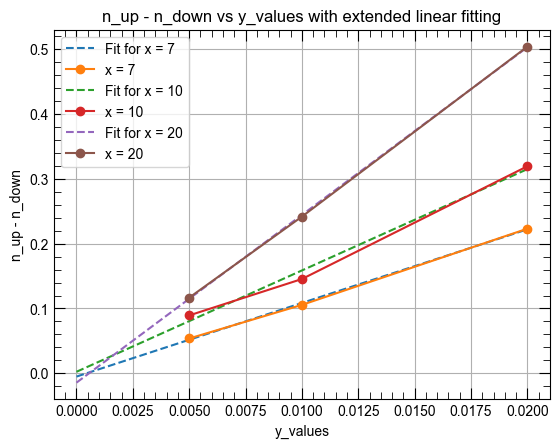

Fitting coefficients saved in 'fit_coefficients.json':
{'x = 7': {'slope': 11.344613177636083, 'intercept': -0.004921818924504825}, 'x = 10': {'slope': 15.613039379143371, 'intercept': 0.0024769608703522792}, 'x = 20': {'slope': 25.84099078310624, 'intercept': -0.014254359282551636}}


In [9]:
import os
import json
import numpy as np
import matplotlib.pyplot as plt

# ループで使用する値のリスト
x_values = [7, 10, 20]
y_values = [0.02, 0.01, 0.005]
z_values = [0.25]

# フィッティングの結果を保存するディクショナリ
fit_coeff_dict = {}

# プロットの設定
plt.figure()

# ループ処理
for x in x_values:
    y_list = []
    n_diff_list = []

    for z in z_values:
        for y in y_values:
            # ディレクトリ名の作成
            dir_name = f"b{x}-h{y}-U3.0-J{z}"

            # dft_filenameの作成
            dft_filename = f"{dir_name}/nsp"

            json_file_path = os.path.join(dir_name, "n_up_down.json")

            # JSONファイルの読み込み
            try:
                with open(json_file_path, "r") as json_file:
                    data = json.load(json_file)
                    n_up = data["n_up"]
                    n_down = data["n_down"]

                    # n_up - n_down の計算
                    n_diff = (n_up - n_down) / 4

                    # プロット用のリストに追加
                    y_list.append(y)
                    n_diff_list.append(n_diff)

                    print(
                        f"x = {x}, n_up: {n_up}, n_down: {n_down}, n_up - n_down: {n_diff}"
                    )

            except FileNotFoundError:
                print(f"File {json_file_path} not found.")
            except json.JSONDecodeError:
                print(f"Error decoding JSON from file {json_file_path}.")

    # 線形フィッティング
    if len(y_list) > 1:
        # numpyのpolyfitを使って1次のフィッティング
        coeff = np.polyfit(y_list, n_diff_list, 1)  # 傾きと切片を取得
        slope, intercept = coeff

        # ディクショナリにフィッティング結果を保存
        fit_coeff_dict[f"x = {x}"] = {"slope": slope, "intercept": intercept}

        # フィッティング線を広げてプロット（y=0をカバーする範囲）
        y_min = min(y_list)
        y_max = max(y_list)
        y_extend = np.linspace(0, y_max, 100)  # y=0 から y_values の最大値まで拡張

        fit_line = np.polyval(coeff, y_extend)

        # フィッティング結果を表示
        plt.plot(y_extend, fit_line, "--", label=f"Fit for x = {x}")

    # 各 x_values に対して元のデータをプロット
    plt.plot(y_list, n_diff_list, marker="o", label=f"x = {x}")

# フィッティング係数を保存するためにJSONファイルに書き込み
with open("fit_coefficients.json", "w") as outfile:
    json.dump(fit_coeff_dict, outfile, indent=4)

# プロットの詳細設定
plt.xlabel("y_values")
plt.ylabel("n_up - n_down")
plt.title("n_up - n_down vs y_values with extended linear fitting")
plt.grid(True)
plt.legend()  # 凡例を追加
plt.show()

# 保存したフィッティング係数を確認
print("Fitting coefficients saved in 'fit_coefficients.json':")
print(fit_coeff_dict)

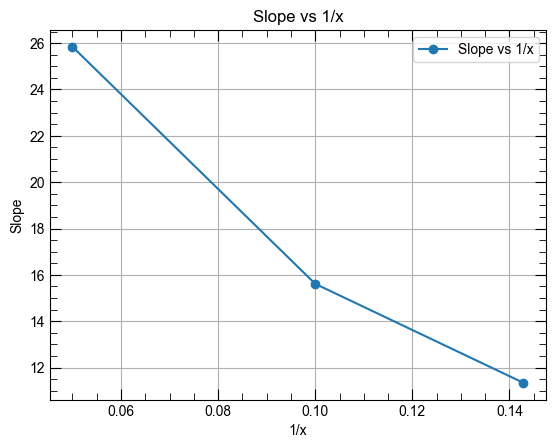

In [10]:
# プロット用のリストを作成
x_inv_list = []
slope_list = []

# 保存したフィッティング係数から slope を抽出
for x in x_values:
    x_inv_list.append(1 / x)  # 1/x の計算
    slope_list.append(fit_coeff_dict[f"x = {x}"]["slope"])  # 傾きをリストに追加

# プロット
plt.figure()
plt.plot(x_inv_list, slope_list, marker="o", linestyle="-", label="Slope vs 1/x")
plt.xlabel("1/x")
plt.ylabel("Slope")
plt.title("Slope vs 1/x")
plt.grid(True)
plt.legend()
plt.show()

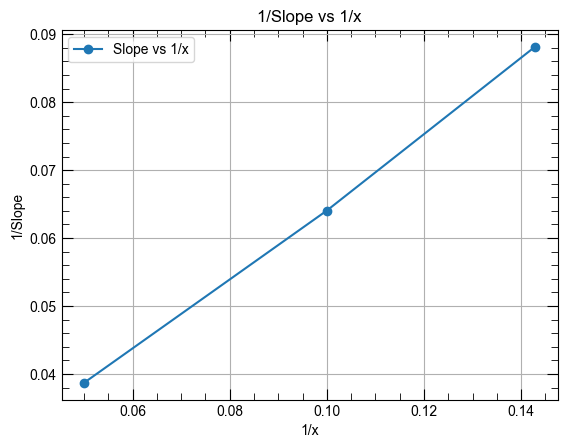

In [11]:
# プロット用のリストを作成
x_inv_list = []
slope_inv_list = []

# 保存したフィッティング係数から slope を抽出
for x in x_values:
    x_inv_list.append(1 / x)  # 1/x の計算
    slope_inv_list.append(1 / fit_coeff_dict[f"x = {x}"]["slope"])  # 傾きをリストに追加

# プロット
plt.figure()
plt.plot(x_inv_list, slope_inv_list, marker="o", linestyle="-", label="Slope vs 1/x")
plt.xlabel("1/x")
plt.ylabel("1/Slope")
plt.title("1/Slope vs 1/x")
plt.grid(True)
plt.legend()
plt.show()

[0.53182835 0.01171502]


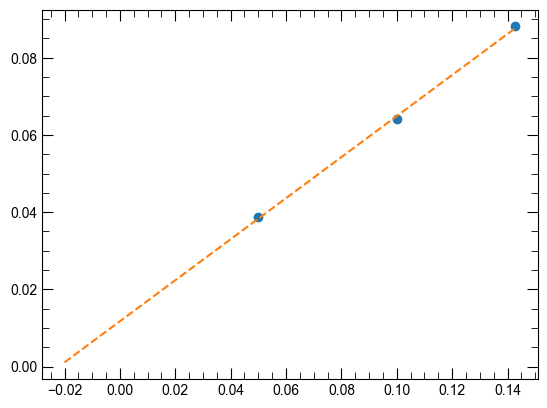

In [12]:
cw_coeff = np.polyfit(x_inv_list, slope_inv_list, 1)  # 傾きと切片を取得
print(cw_coeff)
fig, ax = plt.subplots()
x_inv_min = min(x_inv_list)
x_inv_max = max(x_inv_list)
x_inv_extend = np.linspace(-0.02, x_inv_max, 100)  # y=0 から y_values の最大値まで拡張
fig_line = np.polyval(cw_coeff, x_inv_extend)

ax.plot(x_inv_list, slope_inv_list, marker="o", linestyle="")
ax.plot(x_inv_extend, np.polyval(cw_coeff, x_inv_extend), linestyle="--")
fig.savefig("U3.0-J0.25.pdf")